<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Otras_aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una tienda pequeña tiene un lote de estacionamiento con 6 lugares disponible. Los clientes llegan en forma aleatoria de acuerdo a un proceso poisson a una razón media de 10 clientes por hora, y se van inmediatamente si no existen lugares disponibles en el estacionamiento. El tiempo que un auto permanece en el estacionamiento sigue un distribución uniforme entre 10 y 30 minutos.

a) ¿Que porcentaje de los clientes es perdido por no tener más lugares disponibles?

b)¿Cuál es la probabilidad de encontrar un lugar disponible en el estacionamiento?

c)¿Cuál es el porcentaje promedio de espacios disponibles?

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [65]:
#Parametros
lambda_llegadas = 10 #tasa de llegadas (autos por hora)
num_espacios = 6 #número de espacios en el estacionamiento
tiempo_simulacion = 1000 #tiempo de simulación en horas
tiempo = 1

In [66]:
#Conbvertir tiempos a minutos para mayor precisión
lambda_llegadas_minutos = lambda_llegadas / 60  #tasa de llegadas por minutos
tiempo_simulacion_minutos = tiempo_simulacion * 60 #tiempo de simulación en minutos

In [67]:
#Inicialización de contadores
autos_perdidos = 0
autos_estacionados = 0
espacios_ocupados = 0
tiempo_espacios_ocupados = np.zeros(num_espacios)
espacios_disponibles = [0] * tiempo_simulacion_minutos  #Para registrar espacios disponibles en cada minuto
porcentaje_autos_perdidos_acumulados = [] #Para registrar el porcentaje acumulado de autos perdidos en cada eventos
eventos_procesados = 0

In [68]:
#Evento de llegada y salida de autos
eventos = []

In [69]:
#Generar eventos de llegada
tiempo_actual = 0
while tiempo_actual < tiempo_simulacion_minutos:
    tiempo_llegada = np.random.exponential(1/lambda_llegadas_minutos)
    tiempo_actual += tiempo_llegada
    if tiempo_actual <tiempo_simulacion_minutos:
      eventos.append((tiempo_actual, 'llegada'))

In [70]:
# Procesar eventos
tiempo_actual = 0
while eventos:
    eventos.sort()
    tiempo_actual, tipo_evento = eventos.pop(0)

    # Procesar llegada
    if tipo_evento == 'llegada':
        if espacios_ocupados < num_espacios:
            # Encontrar un espacio disponible
            tiempo_permanencia = np.random.uniform(10, 30)
            eventos.append((tiempo_actual + tiempo_permanencia, 'salida'))
            autos_estacionados += 1
            espacios_ocupados += 1
            for i in range(num_espacios):
                if tiempo_espacios_ocupados[i] == 0:
                    tiempo_espacios_ocupados[i] = tiempo_permanencia
                    break
        else:
            autos_perdidos += 1

    # Procesar salida
    elif tipo_evento == 'salida':
        if espacios_ocupados > 0:
            espacios_ocupados -= 1
            for i in range(num_espacios):
                if tiempo_espacios_ocupados[i] > 0:
                    tiempo_espacios_ocupados[i] = 0
                    break

    # Registrar el estado de los espacios disponibles
    if tiempo_actual < tiempo_simulacion_minutos:
        espacios_disponibles[int(tiempo_actual)] = num_espacios - espacios_ocupados

    # Actualizar el porcentaje acumulado de autos perdidos
    eventos_procesados += 1
    porcentaje_autos_perdidos_acumulados.append((autos_perdidos / eventos_procesados) * 100)

In [71]:
# Resultados
total_autos = autos_perdidos + autos_estacionados
porcentaje_autos_perdidos = (autos_perdidos / total_autos) * 100
probabilidad_espacio_disponible = 1 - (autos_perdidos / total_autos)
porcentaje_espacios_disponibles = (np.sum(espacios_disponibles) / tiempo_simulacion_minutos) * 100


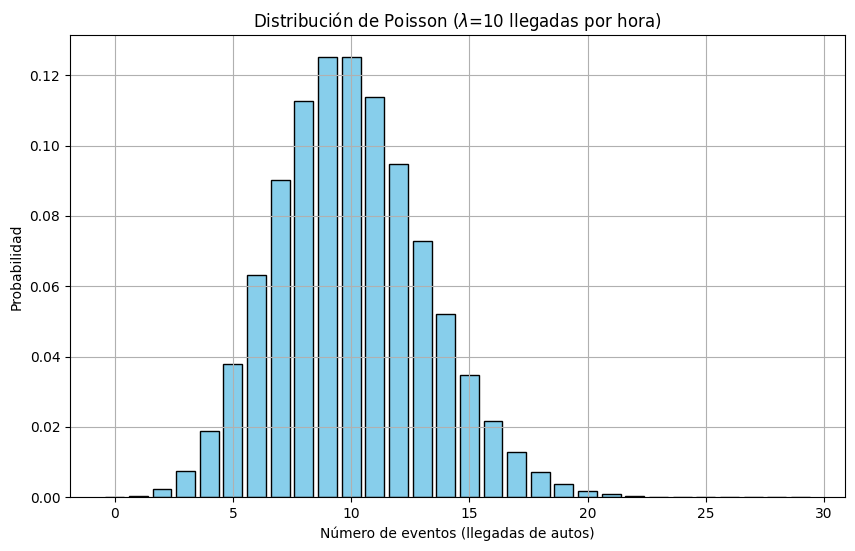

In [72]:
# Distribución de Poisson
x = np.arange(0, 30)  # rango de valores posibles (número de eventos)
poisson_prob = poisson.pmf(x, lambda_llegadas * tiempo)  # función de masa de probabilidad

# Gráfica de la distribución de Poisson
plt.figure(figsize=(10, 6))
plt.bar(x, poisson_prob, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Número de eventos (llegadas de autos)')
plt.ylabel('Probabilidad')
plt.title(f'Distribución de Poisson ($\lambda$={lambda_llegadas} llegadas por hora)')
plt.grid(True)
plt.show()

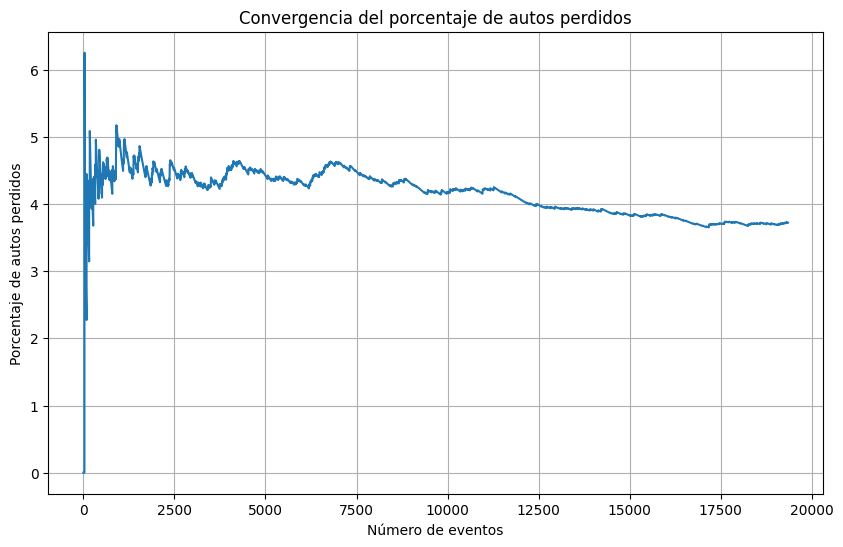

In [73]:
# Gráfica de convergencia del porcentaje de autos perdidos
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(porcentaje_autos_perdidos_acumulados)), porcentaje_autos_perdidos_acumulados)
plt.xlabel('Número de eventos')
plt.ylabel('Porcentaje de autos perdidos')
plt.title('Convergencia del porcentaje de autos perdidos')
plt.grid(True)
plt.show()

In [74]:
# Intervalos de confianza
confianza = 0.95
z = 1.96  # Valor de z para un intervalo de confianza del 95%
n = len(porcentaje_autos_perdidos_acumulados)
mean = np.mean(porcentaje_autos_perdidos_acumulados)
std = np.std(porcentaje_autos_perdidos_acumulados)
error = z * (std / np.sqrt(n))
intervalo_confianza = (mean - error, mean + error)

print(f"Intervalo de confianza del 95% para el porcentaje de autos perdidos: {intervalo_confianza}")

Intervalo de confianza del 95% para el porcentaje de autos perdidos: (4.148022596765835, 4.158054140748258)


In [75]:
# Generar tiempos de permanencia para las gráficas FDP y FDA
tiempos_permanencia = np.random.uniform(10, 30, size=10000)

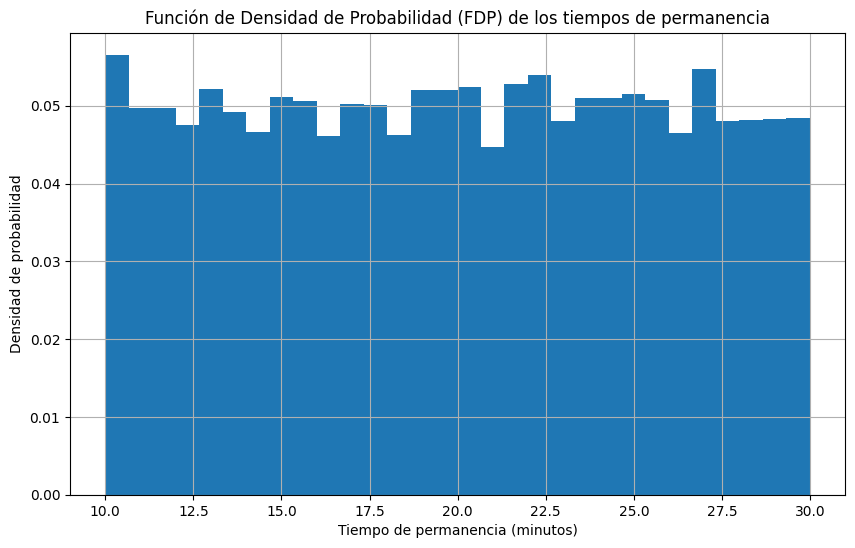

In [76]:
# Gráfica de la FDP de los tiempos de permanencia
plt.figure(figsize=(10, 6))
plt.hist(tiempos_permanencia, bins=30, density=True)
plt.xlabel('Tiempo de permanencia (minutos)')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad de Probabilidad (FDP) de los tiempos de permanencia')
plt.grid(True)
plt.show()

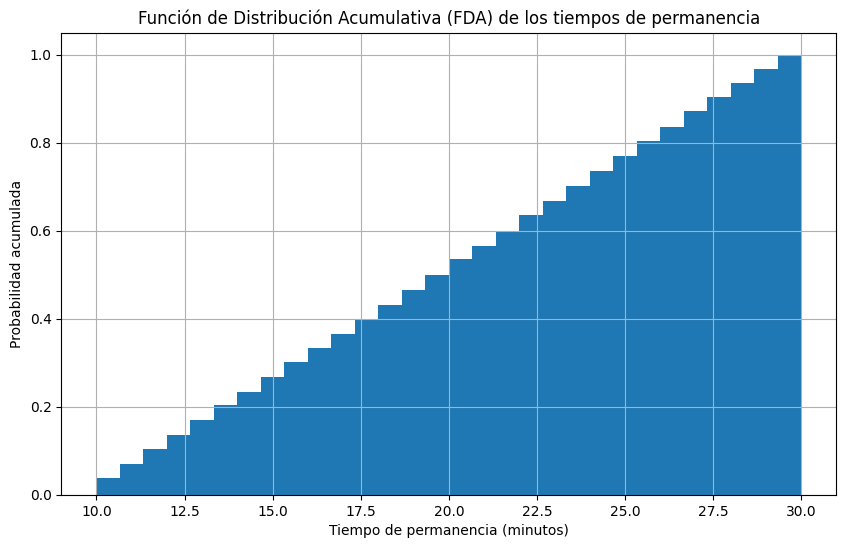

In [77]:
# Gráfica de la FDA de los tiempos de permanencia
plt.figure(figsize=(10, 6))
plt.hist(tiempos_permanencia, bins=30, density=True, cumulative=True)
plt.xlabel('Tiempo de permanencia (minutos)')
plt.ylabel('Probabilidad acumulada')
plt.title('Función de Distribución Acumulativa (FDA) de los tiempos de permanencia')
plt.grid(True)
plt.show()

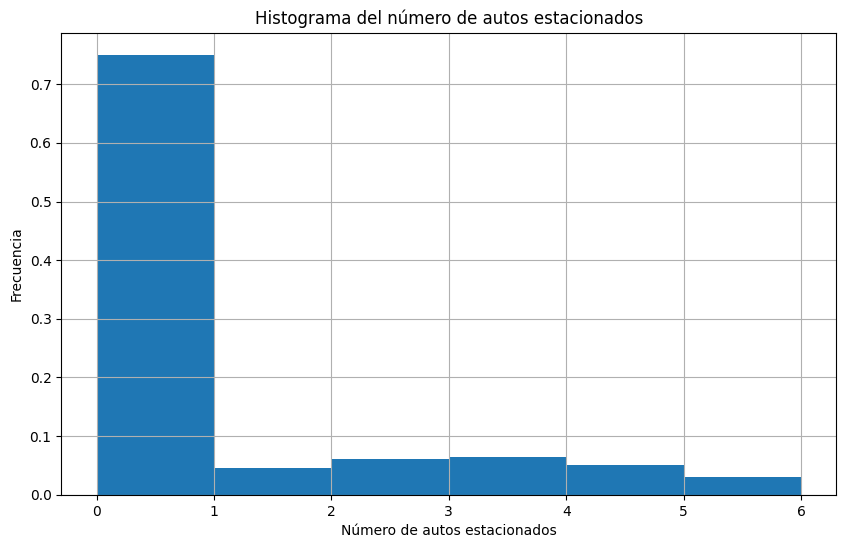

In [78]:
# Histograma del número de autos estacionados en cada momento
plt.figure(figsize=(10, 6))
plt.hist(espacios_disponibles, bins=num_espacios, density=True)
plt.xlabel('Número de autos estacionados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de autos estacionados')
plt.grid(True)
plt.show()

In [79]:
# Resultados finales
(porcentaje_autos_perdidos, probabilidad_espacio_disponible, porcentaje_espacios_disponibles)

(7.177033492822966, 0.9282296650717703, 71.42333333333333)